<a href="https://colab.research.google.com/github/Meghashyamt/python/blob/master/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import librarires 
import numpy as np
import pandas as pd

#import data visuvalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline





#import train test
from sklearn.model_selection import train_test_split

#import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from scipy import stats

In [0]:
dataset= 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data= pd.read_csv(dataset, sep=';')

In [206]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [207]:
data.shape

(1599, 12)

In [208]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [209]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

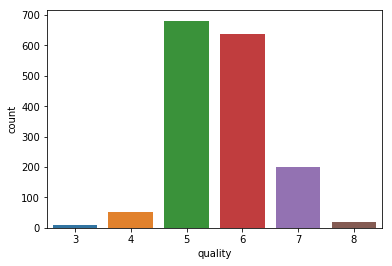

In [210]:
sb.countplot(x=data.quality)

In [0]:
X=data.iloc[:, :10]
y=data.quality

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15, random_state=20)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model = DecisionTreeClassifier()

In [215]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
from sklearn.preprocessing import scale

In [0]:
data['taste']='Good'

In [0]:
data.loc[(data.quality<5),'taste']='Bad'
data.loc[(data.quality>=7),'taste']='Good'
data.loc[(data.quality>=5) & (data.quality<=6),'taste']='Normal'

In [219]:
data.head(1509)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,Normal
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5,Normal
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5,Normal
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6,Normal
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5,Normal
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5,Normal
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.40,5,Normal
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,Good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,Good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,Normal


In [0]:
predict= model.predict(X_test)

In [221]:
y_test

1508    6
718     5
1370    5
579     6
498     8
1587    6
531     5
254     6
698     5
665     5
1297    6
472     6
756     6
700     6
1476    5
545     5
338     6
945     7
841     5
1458    5
1348    5
1172    6
20      6
731     5
1011    6
779     5
479     6
83      5
1427    5
1550    5
       ..
749     6
867     6
820     5
1594    5
941     7
863     5
635     5
726     6
900     5
212     6
780     6
316     5
652     5
308     6
745     6
336     6
1320    5
544     6
1287    5
1248    6
738     5
391     6
509     7
1459    7
1589    5
116     6
875     7
872     4
1286    6
412     5
Name: quality, Length: 240, dtype: int64

In [222]:
predict

array([5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6,
       4, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 4, 5, 7, 6, 7, 5, 8, 6, 5, 4, 5,
       5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 7, 6, 6, 5, 7, 6, 6,
       5, 4, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5,
       4, 4, 5, 5, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 4, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 7, 7, 5, 6, 6, 7,
       5, 6, 5, 5, 7, 7, 5, 6, 5, 5, 7, 6, 8, 5, 6, 4, 6, 6, 6, 7, 5, 5,
       6, 6, 8, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 4, 6, 7, 8,
       6, 5, 7, 5, 6, 6, 6, 7, 4, 6, 5, 7, 5, 8, 5, 6, 6, 5, 6, 5])

In [142]:
accuracy_score(y_test, predict)

0.5958333333333333

0.5833333333333334

In [143]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.70      0.67      0.69       103
           6       0.62      0.62      0.62        99
           7       0.43      0.39      0.41        33
           8       0.00      0.00      0.00         2

   micro avg       0.60      0.60      0.60       240
   macro avg       0.35      0.34      0.34       240
weighted avg       0.62      0.60      0.61       240

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.71      0.66      0.68       103
           6       0.57      0.60      0.58        99
           7       0.46      0.39      0.43        33
           8       0.00      0.00      0.00         2

   micro avg       0.58      0.58      0.58       240
   macro avg       0.35      0.33      0.34       240
weighted avg       0.60      0.58      0.59       240



In [0]:
#ensemble learning is called as 'Random forest'

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
X=data.loc[:,'alcohol']
y=data.taste

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15, random_state=20)

In [0]:
model = RandomForestClassifier()

In [199]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [200]:
predict1= model.predict(X_test)

NotFittedError: ignored

In [201]:
y_test

1508    6
718     5
1370    5
579     6
498     8
1587    6
531     5
254     6
698     5
665     5
1297    6
472     6
756     6
700     6
1476    5
545     5
338     6
945     7
841     5
1458    5
1348    5
1172    6
20      6
731     5
1011    6
779     5
479     6
83      5
1427    5
1550    5
       ..
749     6
867     6
820     5
1594    5
941     7
863     5
635     5
726     6
900     5
212     6
780     6
316     5
652     5
308     6
745     6
336     6
1320    5
544     6
1287    5
1248    6
738     5
391     6
509     7
1459    7
1589    5
116     6
875     7
872     4
1286    6
412     5
Name: quality, Length: 240, dtype: int64

In [202]:
predict

array([6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6, 7, 5, 6, 6, 5, 4, 5,
       5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 4,
       6, 4, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 7, 6, 6,
       5, 4, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 6, 5,
       4, 4, 6, 5, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 4, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6, 7, 5, 5, 5, 7, 7, 5, 6, 6, 7,
       5, 6, 5, 5, 7, 8, 5, 6, 5, 5, 7, 6, 8, 5, 6, 4, 6, 6, 6, 7, 5, 5,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 4, 7, 6, 6, 6, 6, 5, 5, 6, 7, 8,
       6, 5, 7, 5, 7, 6, 6, 5, 4, 6, 5, 7, 6, 7, 5, 6, 6, 5, 6, 5])

In [203]:
accuracy_score(y_test, predict1)

0.6666666666666666